In [2]:
%pip install tensorflow keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from keras.api.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train_normalized = x_train / 255.0

In [5]:
import numpy as np
random_index = np.random.choice(x_train.shape[0], 10000)
x_train = x_train_normalized[random_index]
y_train = y_train[random_index]
x_train.shape

(10000, 28, 28)

In [6]:
from keras.api.models import Sequential
from keras.api.layers import Flatten, Input, Dense, Conv2D, MaxPooling2D, AveragePooling2D

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    AveragePooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    AveragePooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(180, activation="relu"),
    Dense(80, activation="relu"),
    Dense(10, activation="softmax")
])

In [7]:
import keras
'''
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
'''
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 13, 13, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 5, 5, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 180)            │       288,180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 80)             │        14,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,286 (1.23 MB)

 Trainable params: 322,286 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(
    x_train, y_train,
    validation_split=0.2, batch_size=16, epochs=30, verbose=1
)

Epoch 1/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7449 - loss: 0.7934 - val_accuracy: 0.9390 - val_loss: 0.2027
Epoch 2/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9623 - loss: 0.1334 - val_accuracy: 0.9635 - val_loss: 0.1145
Epoch 3/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9776 - loss: 0.0720 - val_accuracy: 0.9765 - val_loss: 0.0816
Epoch 4/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9864 - loss: 0.0443 - val_accuracy: 0.9795 - val_loss: 0.0731
Epoch 5/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9847 - loss: 0.0395 - val_accuracy: 0.9765 - val_loss: 0.0904
Epoch 6/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9912 - loss: 0.0265 - val_accuracy: 0.9770 - val_loss: 0.0821
Epoch 7/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9914 - loss: 0.0300 - val_accuracy: 0.9755 - val_loss: 0.0922
Epoch 8/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9938 - loss: 0.0187 - val_accuracy: 0.

In [9]:
x_test_normalized = x_test / 255.0
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(test_loss, test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9805 - loss: 37.8963
29.967193603515625 0.9837999939918518


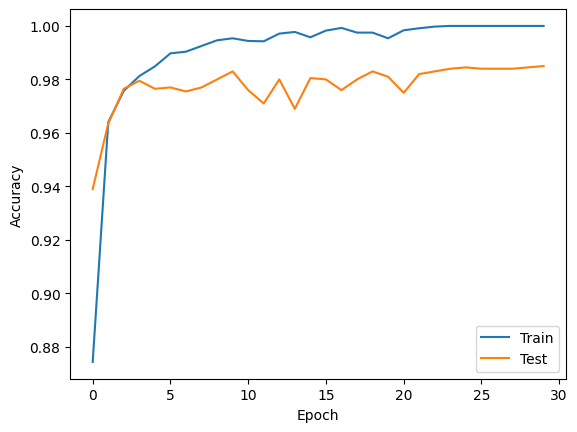

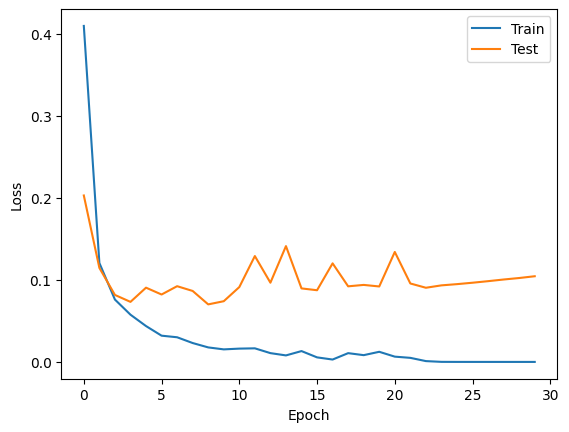

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"])
plt.show()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"])
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


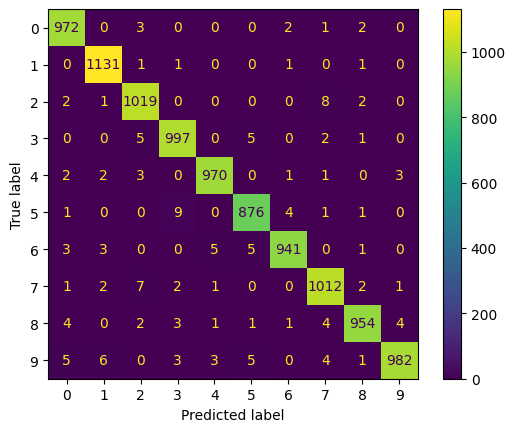

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_predicted = model.predict(x_test_normalized)
y_predicted_classes = y_predicted.argmax(axis=1)
cm = confusion_matrix(y_test, y_predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
from keras.api.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, dpi=70)